In [58]:
import pandas as pd
import geopandas as gp
import pylab as pl
from sklearn.cluster import KMeans
from shapely.geometry import Point
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [20]:
#CitiBike Stations
stations = pd.read_csv('../data/external/citibike_data/citi_bike_station_info.csv')
geometry = gp.GeoSeries([Point(xy) for xy in zip(stations.Longitude, stations.Latitude)])
geo_stations = gp.GeoDataFrame(stations, geometry=geometry)
geo_stations.crs = {'init' :'epsg:4326'}
geo_stations.drop(['Location', 'Latitude', 'Longitude'], axis = 1, inplace = True)
geo_stations.rename(columns={'Station_id' : 'station_id'}, inplace=True)
geo_stations.head()

,station_id,Station_Name,geometry
0,72,W 52 St & 11 Ave,POINT (-73.99392888 40.76727216)
1,79,Franklin St & W Broadway,POINT (-74.00666661 40.71911552)
2,82,St James Pl & Pearl St,POINT (-74.00016545 40.71117416)
3,83,Atlantic Ave & Fort Greene Pl,POINT (-73.97632328 40.68382604)
4,116,W 17 St & 8 Ave,POINT (-74.00149746 40.74177603)


In [21]:
#Master file with ridership and metrics
master_norm = pd.read_csv('../data/processed/master_norm.csv')
master_norm.head()

,station_id,ridership_0115,ridership_0215,ridership_0315,ridership_0415,ridership_0515,ridership_0615,ridership_0715,ridership_0815,ridership_0915,...,ridership_1215,avg_ridership_2015,bike_lane_score,street_quality_score,tree_score,traffic_volume,median_hh_income,pop_density,park,subway_entrance
0,72,-0.361416,-0.259163,-0.019305,-0.017391,0.013852,-0.044803,-0.053536,0.290089,0.380089,...,-0.037283,0.134845,-1.037727,0.790673,-0.554668,0.001493,1.069154e-01,0.791144,1.0,0.0
1,79,-0.485013,-0.599695,-0.423754,-0.190652,-0.278161,-0.223134,-0.296086,-0.030448,0.089412,...,-0.087781,-0.153108,0.722092,1.584334,-0.904716,-0.424358,2.130764e-15,0.218505,0.0,1.0
2,82,-0.924468,-0.738256,-0.852390,-0.930948,-0.938365,-0.991566,-0.960664,-0.681822,-0.728118,...,-0.721558,-0.924446,-1.037727,-0.135265,0.240854,0.155045,-3.670914e-01,-0.170810,1.0,0.0
3,83,-1.013732,-1.005985,-1.020350,-0.961663,-0.921605,-0.966611,-0.744548,-0.443273,-0.577905,...,-0.718631,-0.849354,-1.037727,0.096220,-1.334880,2.144695,-3.877741e-02,-1.079345,0.0,0.0
4,116,1.454770,1.415314,1.430531,-0.029204,-0.322344,1.012182,1.117474,1.390545,1.661106,...,1.454217,1.256217,1.308698,1.485126,0.813900,0.086690,5.403333e-01,0.581773,1.0,0.0


In [91]:
X = master_norm[['station_id',u'bike_lane_score' , u'subway_entrance', u'median_hh_income', u'pop_density', 'ridership_0915']]
X.head()

,station_id,bike_lane_score,subway_entrance,median_hh_income,pop_density,ridership_0915
0,72,-1.037727,0.0,1.069154e-01,0.791144,0.380089
1,79,0.722092,1.0,2.130764e-15,0.218505,0.089412
2,82,-1.037727,0.0,-3.670914e-01,-0.170810,-0.728118
3,83,-1.037727,0.0,-3.877741e-02,-1.079345,-0.577905
4,116,1.308698,0.0,5.403333e-01,0.581773,1.661106


In [92]:
X.dropna(inplace=True)
X.shape

/home/aaron/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(426, 6)

In [93]:
significant_data = pd.merge(X, geo_stations, on = 'station_id', how = 'inner')
significant_data.head()

,station_id,bike_lane_score,subway_entrance,median_hh_income,pop_density,ridership_0915,Station_Name,geometry
0,72,-1.037727,0.0,1.069154e-01,0.791144,0.380089,W 52 St & 11 Ave,POINT (-73.99392888 40.76727216)
1,79,0.722092,1.0,2.130764e-15,0.218505,0.089412,Franklin St & W Broadway,POINT (-74.00666661 40.71911552)
2,82,-1.037727,0.0,-3.670914e-01,-0.170810,-0.728118,St James Pl & Pearl St,POINT (-74.00016545 40.71117416)
3,83,-1.037727,0.0,-3.877741e-02,-1.079345,-0.577905,Atlantic Ave & Fort Greene Pl,POINT (-73.97632328 40.68382604)
4,116,1.308698,0.0,5.403333e-01,0.581773,1.661106,W 17 St & 8 Ave,POINT (-74.00149746 40.74177603)


In [94]:
#Saving shapefile
significant_data = gp.GeoDataFrame(significant_data)
significant_data.to_file('../data/project_work/significant_data')

In [96]:
#KMeans for all metrics
kmeans = KMeans(6, random_state=123).fit(X[[u'bike_lane_score' , u'subway_entrance', u'median_hh_income'\
                                            , u'pop_density', 'ridership_0915']])
X['kmeans_label'] = kmeans.labels_
X.head()

/home/aaron/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,station_id,bike_lane_score,subway_entrance,median_hh_income,pop_density,ridership_0915,kmeans_label
0,72,-1.037727,0.0,1.069154e-01,0.791144,0.380089,5
1,79,0.722092,1.0,2.130764e-15,0.218505,0.089412,0
2,82,-1.037727,0.0,-3.670914e-01,-0.170810,-0.728118,3
3,83,-1.037727,0.0,-3.877741e-02,-1.079345,-0.577905,3
4,116,1.308698,0.0,5.403333e-01,0.581773,1.661106,4


In [98]:
#Master file with real data (Not normalized)
master = pd.read_csv('../data/processed/master.csv')
master = master[['station_id',u'bike_lane_score' , u'subway_entrance', \
                 u'median_hh_income', u'pop_density', 'ridership_0915']]
master.head()

,station_id,bike_lane_score,subway_entrance,median_hh_income,pop_density,ridership_0915
0,72,0.0,0.0,90174.000000,0.000807,3667.0
1,79,3.0,1.0,86523.139535,0.000631,3011.0
2,82,0.0,0.0,73988.000000,0.000511,1166.0
3,83,0.0,0.0,85199.000000,0.000231,1505.0
4,116,4.0,0.0,104974.000000,0.000742,6558.0


In [99]:
#Merging with get clusters with real data
clustered_data = pd.merge(master, X, on = 'station_id', how = 'inner')
clustered_data.head()

,station_id,bike_lane_score_x,subway_entrance_x,median_hh_income_x,pop_density_x,ridership_0915_x,bike_lane_score_y,subway_entrance_y,median_hh_income_y,pop_density_y,ridership_0915_y,kmeans_label
0,72,0.0,0.0,90174.000000,0.000807,3667.0,-1.037727,0.0,1.069154e-01,0.791144,0.380089,5
1,79,3.0,1.0,86523.139535,0.000631,3011.0,0.722092,1.0,2.130764e-15,0.218505,0.089412,0
2,82,0.0,0.0,73988.000000,0.000511,1166.0,-1.037727,0.0,-3.670914e-01,-0.170810,-0.728118,3
3,83,0.0,0.0,85199.000000,0.000231,1505.0,-1.037727,0.0,-3.877741e-02,-1.079345,-0.577905,3
4,116,4.0,0.0,104974.000000,0.000742,6558.0,1.308698,0.0,5.403333e-01,0.581773,1.661106,4


In [101]:
#Dropping irrelavant data
clustered_data.drop([u'bike_lane_score_y', u'subway_entrance_y', u'median_hh_income_y',
       u'pop_density_y', u'ridership_0915_y'], axis = 1, inplace = True)
clustered_data.head()

,station_id,bike_lane_score_x,subway_entrance_x,median_hh_income_x,pop_density_x,ridership_0915_x,kmeans_label
0,72,0.0,0.0,90174.000000,0.000807,3667.0,5
1,79,3.0,1.0,86523.139535,0.000631,3011.0,0
2,82,0.0,0.0,73988.000000,0.000511,1166.0,3
3,83,0.0,0.0,85199.000000,0.000231,1505.0,3
4,116,4.0,0.0,104974.000000,0.000742,6558.0,4


In [106]:
#Renaming columns
clustered_data = clustered_data.rename(columns={'bike_lane_score_x' : 'bike_lane_score', \
                                                'subway_entrance_x' : 'subway_entrance',\
                             'median_hh_income_x' : 'median_hh_income', 'pop_density_x' : 'pop_density', \
                              'ridership_0915_x' : 'ridership_0915'})
clustered_data.head()

,station_id,bike_lane_score,subway_entrance,median_hh_income,pop_density,ridership_0915,kmeans_label
0,72,0.0,0.0,90174.000000,0.000807,3667.0,5
1,79,3.0,1.0,86523.139535,0.000631,3011.0,0
2,82,0.0,0.0,73988.000000,0.000511,1166.0,3
3,83,0.0,0.0,85199.000000,0.000231,1505.0,3
4,116,4.0,0.0,104974.000000,0.000742,6558.0,4


In [107]:
#Merging with station geometry
master_with_cluster = pd.merge(clustered_data, geo_stations, on = 'station_id', how = 'inner')
master_with_cluster.head()

,station_id,bike_lane_score,subway_entrance,median_hh_income,pop_density,ridership_0915,kmeans_label,Station_Name,geometry
0,72,0.0,0.0,90174.000000,0.000807,3667.0,5,W 52 St & 11 Ave,POINT (-73.99392888 40.76727216)
1,79,3.0,1.0,86523.139535,0.000631,3011.0,0,Franklin St & W Broadway,POINT (-74.00666661 40.71911552)
2,82,0.0,0.0,73988.000000,0.000511,1166.0,3,St James Pl & Pearl St,POINT (-74.00016545 40.71117416)
3,83,0.0,0.0,85199.000000,0.000231,1505.0,3,Atlantic Ave & Fort Greene Pl,POINT (-73.97632328 40.68382604)
4,116,4.0,0.0,104974.000000,0.000742,6558.0,4,W 17 St & 8 Ave,POINT (-74.00149746 40.74177603)


In [108]:
master_with_cluster.to_csv('../data/project_work/master_with_cluster.csv')

In [109]:
#Saving final file
master_with_cluster = gp.GeoDataFrame(master_with_cluster)
master_with_cluster.to_file('../data/project_work/master_with_cluster')

In [110]:
stations.rename(columns={'Station_id' : 'station_id'}, inplace=True)
merge_with_cluster_csv = pd.merge(master_with_cluster, stations, on = 'station_id', how = 'inner')

In [111]:
merge_with_cluster_csv.to_csv('../data/project_work/master_with_cluster.csv')

In [114]:
#Creating dataframe for clusters
cluster_no = []
median_income = []
bike_lane_score = []
subway_entrance = []
pop_density = []
ridership_aug = []
for i in range(6):
    cluster_no.append(i)
    median_income.append((master_with_cluster[master_with_cluster.kmeans_label == i]).median_hh_income.mean())
    bike_lane_score.append((master_with_cluster[master_with_cluster.kmeans_label == i]).bike_lane_score.mean())
    subway_entrance.append((master_with_cluster[master_with_cluster.kmeans_label == i]).subway_entrance.mean())
    pop_density.append((master_with_cluster[master_with_cluster.kmeans_label == i]).pop_density.mean())
    ridership_aug.append(master_with_cluster[master_with_cluster.kmeans_label == i].ridership_0915.mean())
clusters = pd.DataFrame()

for i in range(0,6):
    clusters.loc[i ,'cluster_no'] = cluster_no[i]
    clusters.loc[i ,'median_income'] = median_income[i]
    clusters.loc[i ,'bike_lane_score'] = bike_lane_score[i]
    clusters.loc[i ,'subway_entrance'] = subway_entrance[i]
    clusters.loc[i ,'pop_density'] = pop_density[i]
    clusters.loc[i, 'ridership_aug'] = ridership_aug[i]
clusters

,cluster_no,median_income,bike_lane_score,subway_entrance,pop_density,ridership_aug
0,0.0,90743.455241,3.484132,0.027397,0.000893,3834.260274
1,1.0,77815.587369,3.216263,0.110092,0.000353,1540.357798
2,2.0,248518.666667,1.630303,0.333333,0.000739,5370.000000
3,3.0,70501.341085,0.097578,0.145299,0.000401,1317.641026
4,4.0,96069.218209,2.721986,0.276596,0.000447,6836.404255
5,5.0,92496.506387,0.098592,0.112676,0.000833,3170.718310


Ridership is low in brooklyn (clusters 1 and 2). Low ridership is directly proportional to the low median income in the around the stations.75937.496726	





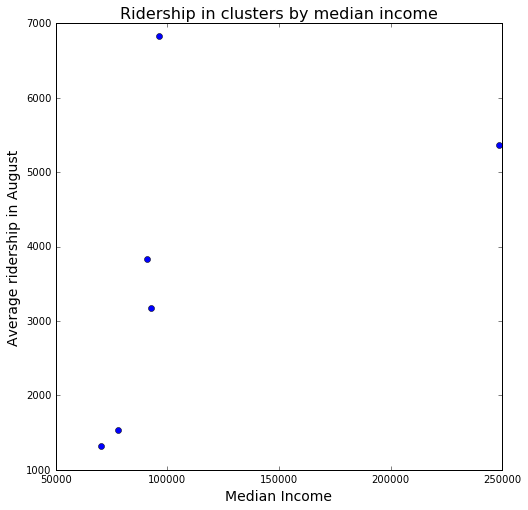

In [115]:
f, ax = plt.subplots(figsize=(8,8))
pl.plot(clusters.median_income ,clusters.ridership_aug, 'o')
pl.xlabel('Median Income', fontsize = 14)
pl.ylabel('Average ridership in August', fontsize = 14)
pl.title('Ridership in clusters by median income', fontsize = 16)

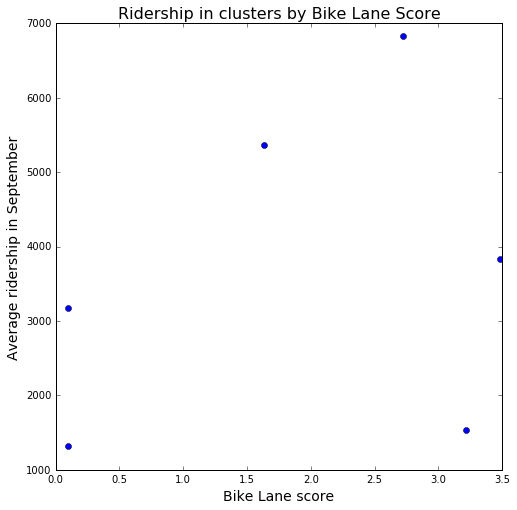

In [116]:
f, ax = plt.subplots(figsize=(8,8))
pl.plot(clusters.bike_lane_score ,clusters.ridership_aug, 'o')
pl.xlabel('Bike Lane score', fontsize = 14)
pl.ylabel('Average ridership in September', fontsize = 14)
pl.title('Ridership in clusters by Bike Lane Score', fontsize = 16)